# MTH9875 Homework 2

Assigned: September 1, 2016.
Due: September 15, 2016 by 6pm.

Late homework **will not be accepted**.

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

<font color="blue">If you encounter problems with Markdown/LaTeX or iPython notebook, please contact your iPython notebook ambassador.


### The  volatility smile in a simple regime-switching model

#### 1. (10 points) 

Consider the simple regime-switching model from Lecture 2 where realized volatility over a one-year period can be either $10\%$ or $30\%$, each with probability $1/2$ (depending on an initial coin toss say).  The density of 1-year returns is given by the sum of the two corresponding normal densities:

In [19]:
d3010 <- function(x){(dnorm(x,sd=.1)+dnorm(x,sd=.3))/2}

The following snippet loads Black-Scholes functions from Lecture 1.  Please use these in your solution.

In [20]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/09/9875HW2.zip", destfile="9875HW2.zip")
unzip(zipfile="9875HW2.zip")

source("BlackScholes.R")

(a) Code a function to return the price of a 1-year European option with log-strike $k$ in this model.  Your function should return the price as a fraction of the current stock price.

(b) Code a function to return the implied volatility 1-year European option with log-strike $k$ in this model.

(c) Draw the 1-year volatility smile in this model for log-strikes from -$2.0$ to $2.0$ with implied volatility on the y-axis and log-strike on the x-axis.  

(d) What is implied volatility at-the-money?  Give intuition as to why.

(e) In the extreme wings of the volatility smile, implied volatility tends to $30\%$.  Why?

Solution:

(a) Code a function to return the price of a 1-year European option with log-strike  kk  in this model. Your function should return the price as a fraction of the current stock price.

Log-strike $k$ is defined by
$$
k = \log\left(\frac{K}{F_T}\right)
$$

In [25]:
### (a) Define the function
EuroOption <- function(k, S0, CallPut) 
{# Pricing formula for call option:
 # r = 0 by default in this sense;
 # T = 1 as given in the question;
 # S0 is not given in the question, but it does not change the result since the result will be
    # presented in fraction of S0. We can randomly assume S0 when we call this function.
    K <- exp(k)
    if (CallPut == "Call")
    {
        return(0.5 * (BSFormula(1, K, 1, 0, 0.1) + BSFormula(1, K, 1, 0, 0.3)))
    }
    else
    {
        return(0.5 * (BSFormulaPut(1, K, 1, 0, 0.1) + BSFormulaPut(1, K, 1, 0, 0.3)))   
    }
}

In [29]:
### (b) Code a function to return the implied volatility 1-year European option with log-strike k in this model.
ImpliedVol <- function(k,SO,CallPut)
{# r = 0 by default in this sense;
 # S0 = 1(Assume), because the final result should be presented in fraction of S0 so the amount of S0 doesn't matter;
 # T = 1 as given in the question;
    K <- exp(k)
    price<- EuroOption (k,SO,CallPut)
    if(CallPut=="Call")
    {
        return(BSImpliedVolCall(1, K, 1, 0, price))
    }
    else
    {
        return(BSImpliedVolPut(1,K,1,0,price))
    }
}

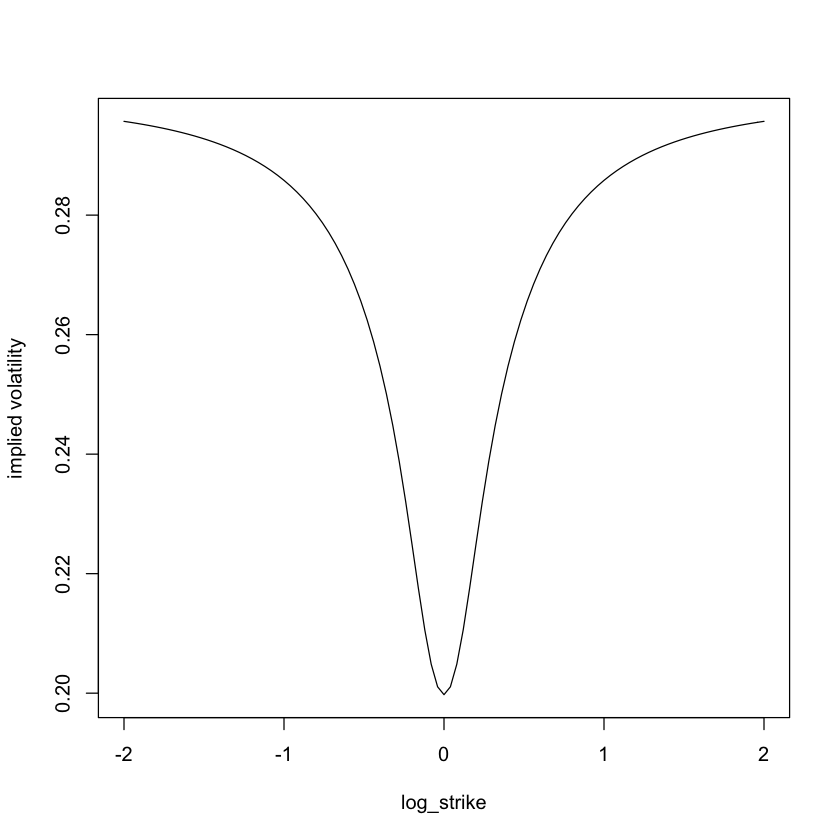

In [27]:
#(c) Draw the 1-year volatility smile in this model for log-strikes from - 2.0 to 2.0 with implied volatility on 
#the y-axis and log-strike on the x-axis.
#Assume S0 = 1 and the option is a call option
curve(ImpliedVol(x,1,"Call"),from = -2, to = 2, xlab ="log_strike",ylab = "implied volatility")


(d) What is implied volatility at-the-money? Give intuition as to why.


since 

$$
k = \log\left(\frac{K}{S0}\right)
$$

At-the-mondy corresponds to K = SO, which means 

$$
k = \log(0) = 1.
$$


In [31]:
atmImpVol <- ImpliedVol(0,1,"Call")
atmImpVol

[1] 0.1997502

The implied Vol of At-the-money call option is nearly 20%.

The intuition is that the density of both regimes attains its maximum around 0. 

The two regimes have comparable influences on the price of the option.

so the implied volatility is the average of the volatilities under the two regimes.

(e) In the extreme wings of the volatility smile, implied volatility tends to 30%. Why?

Implied volatility tends to 30% in the extreme wings of the volatility smile because the extreme wings of the 

volatilty smile corresponds to returns at the tail positions, which is driven by the high volatility.

### Tanaka's formula
$$\newcommand{\supp}{\mathrm{supp}}
\newcommand{\EE}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
$$
#### 2. (6 points)

By applying Itô's lemma as in the notes, prove Tanaka's formula in its usual form:

$$
\left|B_t\right|=\int_0^t\,\sgn(B_s)\,dB_s+L_t
$$
where $B_t$ is a standard Brownian motion, $\sgn$ denotes the sign function

$$
\sgn(x)=\left\{
\begin{array}{ll}
  +1&x \ge 0  \\
 -1 & x <0 
\end{array}
\right.
$$

and $L_t$ is its local time at $0$ (roughly the time spent by $B$ at $0$ before time $t$) given by the formal expression

$$
L_t=\int_0^t\,\delta(B_s)\,ds.
$$

Explain in words what this result means in terms of delta-hedging of a particular options position.


The Tanaka's formula, $ d\left( {S_t-K} \right)^+=\theta \left( {S_t-K}
\right)\,dS_t+\frac{1}{2}\,v_t\,S_t^2\,\delta \left( {S_T-K}
\right)\,dt $, with $K=0$ and $v_t=1$ and note that $|B_t| = B_t^+ + (-B_t)^+$ gives 
$$
d(B_t)^+ = \theta(B_t)dB_t + \frac{1}{2}\delta(B_t)dt\ and \\
d(-B_t)^+ = -\theta(-B_t)+\frac{1}{2}\delta(-B_t)dt = -\theta(-B_t)dB_t + \frac{1}{2}\delta(B_t)dt
$$
Then
\begin{align}
d|B_t| &= d(B_t^+ + (-B_t)^+) = \theta(B_t)dB_t - \theta(-B_t)dB_t + \delta(B_t)dt \\
&= (\theta(B_t)-\theta(-B_t))dB_t + \delta(B_t)dt \\
&= (\mathbf{1}_{B_t>0} - \mathbf{1}_{B_t<0})dB_t + \delta(B_t)dt \\
&= \sgn(B_t)dB_t + \delta(B_t)dt \\
|B_t| &= \int_0^t \left( \sgn(B_s)dB_s + \theta(B_s)ds \right) \\
&= \int_0^t \sgn(B_s)dB_s + L_t
\end{align}

$|B_t|$ represents the payoff of the straddle with $K = 0$. To hedge our position, we need to long one unit of $B_t$ when $B_t$ is above zero and short $B_t$ when $B_t$ is below zero. $\int_0^t\,\sgn(B_s)\,dB_s$ is the delta hedging strategy. 

## Local volatility and implied volatility

#### 3. (6 points) 

Using the BBF formula, prove the well-known rule of thumb that the local volatility skew is roughly twice the implied volatility skew for short expirations.  Formally, for small $T$,

$$
\left.\partial_k \sigma(k,T)\right|_{k=0} \approx 2\, \left.\partial_k \sigma_{BS}(k,T)\right|_{k=0}.
$$

Take derivative of the BBF formula,

\begin{eqnarray}
\partial_k \frac{1}{\sigma_0 (k)}|_{k=0} &=& \partial_k \int_0^1 \frac{d\alpha}{\sigma (\alpha k, 0)} |_{k=0}\\
(-\frac{1}{\sigma_0^2(k)} \partial_k \sigma_0(k))|_{k=0} &=& (\int_0^1 -\frac{\alpha}{\sigma^2 (\alpha k, 0)} \partial_k \sigma (\alpha k, 0) d\alpha) |_{k=0}  \\
\partial_k \sigma_0(k)|_{k=0} &=& \frac{1}{2} \partial_k \sigma (k, 0) |_{k=0}
\end{eqnarray}

Therefore, for small T,

$$
2 \partial_k \sigma_{BS} (k,T) |_{k=0} = \partial_k \sigma(k, T) |_{k=0}
$$

#### 4. (6 points) 

Consider formula (12) from Lecture 2:

$$
v_\ell(k,T) = \frac{\frac{\partial w}{\partial T}}
{\left(1 -\frac 12\frac{k}{w}\,\frac{\partial w}{\partial k}\right)^2
 - \frac14\,\left( \frac{1}{4} + \frac{1}{w} \right)\,
 \left( \frac{\partial w}{\partial k} \right)^2  +
\frac{1}{2}\,\frac{\partial^2 w}{\partial k^2 }}.
$$

Using this formula, show that the simple quadratic parameterization

$$
w(k,T)=\alpha(T)+\beta(T)\,{k}+\gamma(T)\,{k^2}
$$

with $\alpha(T)>0$ and $\gamma(T)>0$ is arbitrageable.  Explain your result in words in terms of option strategies.

By using quadratic parameterization,
$$
\frac{\partial w}{\partial k}=\beta(T)+2\gamma(T)k
$$
$$
\frac{\partial^2 w}{\partial k^2}=2\gamma(T)
$$
Thus,
\begin{eqnarray}
&&\left(1 -\frac 12\frac{k}{w}\,\frac{\partial w}{\partial k}\right)^2
 - \frac14\,\left( \frac{1}{4} + \frac{1}{w} \right)\,
 \left( \frac{\partial w}{\partial k} \right)^2  +
\frac{1}{2}\,\frac{\partial^2 w}{\partial k^2 }\\
&=&\left(1-\frac 12\frac{k}{w}\left(\beta(T)+2\gamma(T)k\right)\right)^2-\frac14\left(\frac14+\frac{1}{w}\right)\left(\beta(T)+2\gamma(T)k\right)^2+\gamma(T)\\
&=&\left(1-\frac 12\frac{k}{w}\left(\beta(T)+2\gamma(T)k\right)\right)^2-\frac{1}{16}\left(\beta(T)+2\gamma(T)k\right)^2-\frac{1}{4w}\left(\beta(T)+2\gamma(T)k\right)^2+\gamma(T)\\
\end{eqnarray}
When $k$ is very large, the 2nd term dominates, which makes $g(k)=\left(1 -\frac 12\frac{k}{w}\,\frac{\partial w}{\partial k}\right)^2
 - \frac14\,\left( \frac{1}{4} + \frac{1}{w} \right)\,
 \left( \frac{\partial w}{\partial k} \right)^2  +
\frac{1}{2}\,\frac{\partial^2 w}{\partial k^2 }<0$.
<br/>From lecture notes,
\begin{eqnarray*}
\frac{\partial C}{\partial k} &=& 
\frac{\partial C_{BS}}{\partial k} + \frac{\partial C_{BS}}{\partial w}\,\frac{\partial w}{\partial k} \nonumber\\
\frac{\partial ^2 C}{\partial k^2 } &=& 
\frac{\partial^2 C_{BS} }{\partial k^2 } + 2\,\frac{\partial ^2 C_{BS} }{\partial k \partial w}\,
\frac{\partial w}{\partial k} + \frac{\partial^2 C_{BS} }{\partial w^2}\,
\left( \frac{\partial w}{\partial k} \right)^2
+ \frac{\partial C_{BS} }{\partial w}\,\frac{\partial ^2 w}{\partial k^2 } \nonumber
\end{eqnarray*}
Since $k=log(K/F_t)$,
$$\frac{\partial k}{\partial K}=\frac{1}{K}=\frac{e^{-k}}{F_t}$$
Thus,
$$\frac{\partial C}{\partial K}=\frac{\partial C}{\partial k}\frac{e^{-k}}{F_t}$$
\begin{eqnarray*}
\frac{\partial^2 C}{\partial K^2}&=&\left(\frac{\partial^2 C}{\partial k^2}-\frac{\partial C}{\partial k}\right)\frac{e^{-k}}{F_t}\\
&=&\left(-\frac{\partial C_{BS} }{\partial k} +
\frac{\partial ^2 C_{BS} }{\partial k^2 } - \frac{\partial
C_{BS} }{\partial w}\,\frac{\partial w}{\partial k} + 2\,\frac{\partial ^2 C_{BS} }{\partial k\, \partial w}\,\frac{\partial w}{\partial k} +\frac{\partial ^2 C_{BS}}{\partial w^2 }\,\left( \frac{\partial w}{\partial k} \right)^2 + \frac{\partial C_{BS}}{\partial w}\,\frac{\partial^2 w}{\partial k^2 }\right)\frac{e^{-k}}{F_t}\\
&=&2\frac{\partial C_{BS}}{\partial w}g(k)\frac{e^{-k}}{F_t}\\
&=&\frac{g(k)}{\sqrt{2\pi w}}e^{-\frac{d_2^2}{2}}<0
\end{eqnarray*}
We can construct a butterfly arbitrage based on this, i.e., long 1 unit of call options struck at $K+\delta K$ and $K-\delta K$, and short 2 units of call option struck at $K$. And you can get $2C(K)-C(K+\delta K)-C(K-\delta K)>0$ at time 0. At maturity, the payoff of the portfolio is at least 0, which is an arbitrage opportunity.